In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 19 08:23:25 2018

@author: inbu
"""

from spectral import *
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [18]:
hyperim = np.load("Oslo_hsi.npy")
wavelength = envi.read_envi_header('Visnir.hdr')['wavelength']
ww = [float(i) for i in wavelength]

# print("Wave lengths", ww)

In [19]:
ww[75]

646.313721

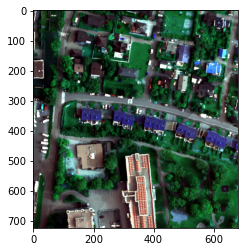

<Figure size 7200x14400 with 0 Axes>

In [20]:
# # Choosing only 3 bands we are composing an artificial RGB image
# #  Stretching for choosing the range, I wangt to see the bands


# vORIGINAL

imshow(hyperim, bands = (10, 48, 70), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))#
# bands =, 10=blue, 48=green, 70=red
plt.figure(figsize=(100,200))
# #np.save("Oslo_hsi.npy",hyperim)

plt.show()

In [21]:
print(645-643.124695)
print(645-646.313721)

1.8753050000000258
-1.3137209999999868


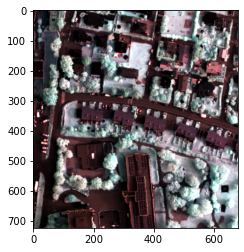

In [22]:
# # Choosing only 3 bands we are composing an artificial RGB image
# #  Stretching for choosing the range, I wangt to see the bands

# vegetation high intensity, others low intensity
imshow(hyperim, (100, 140, 170), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))#
# #np.save("Oslo_hsi.npy",hyperim)

plt.show()

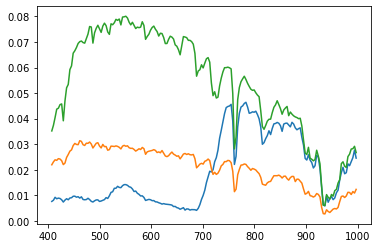

In [23]:
# plotting spectra at selected points as fct of walvelength

z = np.array(hyperim[521,520,:].reshape(-1,1)) # Vegetation
z2 = np.array(hyperim[635,214,:].reshape(-1,1)) #asphalt
z3 = np.array(hyperim[441,36,:].reshape(-1,1)) #roof 
plt.figure()

## ww selected the wavelengths-- for the X axis. For better representation. 
#Otherwise, we will only see the band numbers. Not the wavelength  
plt.plot(ww,z)# Vegetation-- :--blueS
#, RED- red is 650 start, end approx0700,NEAR INFARED-800 to 2,500 nm, Anything after red and before inFRARED are Vegetaion
plt.plot(ww,z2)# Ground with sand--orangee
plt.plot(ww,z3) #Roof top of the car, reflecting lights almost like a mirror---green
plt.show()

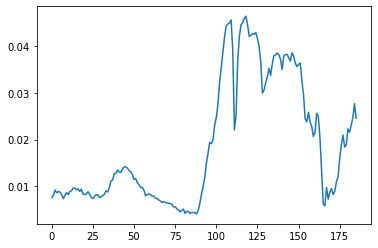

In [24]:
## WRONG
#ww selected the wavelengths-- for the X axis. For better representation. 
#Otherwise, we will only see the band numbers. Not the wavelength  
plt.plot(z)
plt.show()

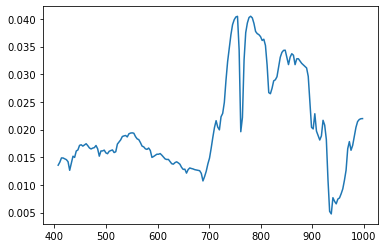

In [25]:
#compute mean of all spectra
m1 = hyperim.mean(axis=0)#-----------making average of all the pixels present in the image
# the spectral of the vegetation dominates the mean,,because the vegetaion ratio in this iamge is huge
# vegetation 750-~850
m2 = m1.mean(axis=0).reshape(-1,1)
plt.figure()
plt.plot(ww,m2)
plt.show()


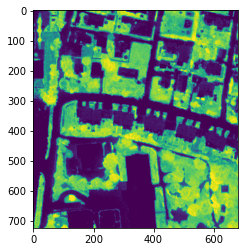

In [26]:
#ndvi( Normalized vegetation index)-- calculating using formula

#NDVI = (NEAR INFARED band - red band)/ (NEAR INFARED band + red band)
#NDVI index is from -1 to 1. -1 definately not vegetation, 1--high clorophil rich vegetation.
#From 0.3 it could be vegetation. Differnt plants have differnt NDVI depening on their health.
# you can threhold the image, and say the except green ones are vegetation


ndvi_ima = (hyperim[:,:,108]-hyperim[:,:,94])/(hyperim[:,:,108]+hyperim[:,:,94])
plt.imshow(ndvi_ima,vmin=0,vmax=0.7)  
# NDVI -1  1  0.1~0.2--unhealthy -- object--almost dead gach  >0.3-moderate    0.6>healthy
# 0.7 ~ 1     -1   1

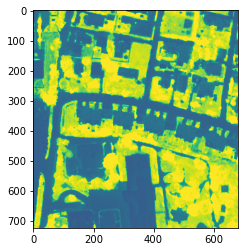

In [27]:
#ndvi( Normalized vegetation index)-- calculating using the spectral python

# ndvi from spectral python
vi = ndvi(hyperim,94, 108)
plt.figure()
plt.imshow(vi,vmin=-0.3,vmax=0.6) # ingun given
# plt.imshow(vi,vmin=0,vmax=0.7) # My check--same result as the manual one

# Unsupervised classification - PCA & K-means clustering

<Figure size 432x288 with 0 Axes>

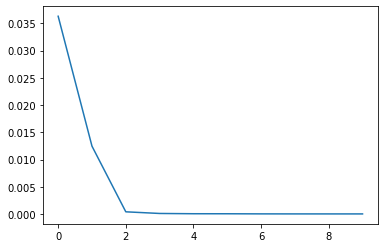

<Figure size 432x288 with 0 Axes>

In [28]:
# pca-- is unsupervised algorithm, dont know anything about the data, group and organize the data
# from the image, we can see that all info is content in the 1st 2 PCs
pc = principal_components(hyperim)
plt.figure()
plt.plot(pc.eigenvalues[0:10])
pc_0999 = pc.reduce(fraction=0.999)# select the PC with 99.9% variance--took 7PCs

# score images
img_pc = pc_0999.transform(hyperim) # then transforming that PC with 99.9% to our original image
# Now we will be looking at the image with 7 bands, instead of 168
plt.figure()


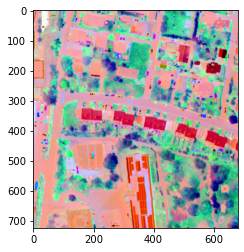

<Figure size 7200x14400 with 0 Axes>

In [30]:

#PC Image
imshow(img_pc, stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))#
# bands =, 10=blue, 48=green, 70=red
plt.figure(figsize=(100,200))
# #np.save("Oslo_hsi.npy",hyperim)

plt.show()

<Figure size 432x288 with 0 Axes>

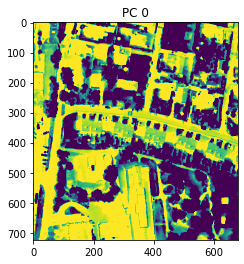

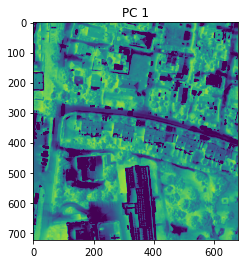

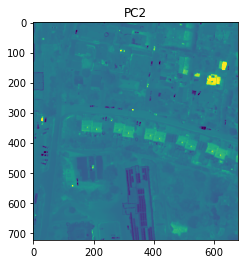

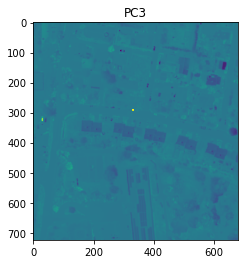

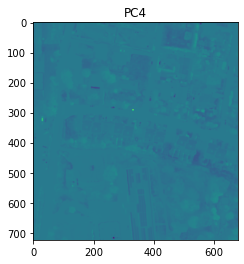

<Figure size 432x288 with 0 Axes>

In [31]:
# SCORE IMAGE
## Values given in the code,,,for vmin and vmax
plt.imshow(img_pc[:,:,0], vmin=-0.1,vmax=0.15)
plt.title("PC 0")
plt.figure()

plt.imshow(img_pc[:,:,1], vmin=-0.1,vmax=0.15)
plt.title("PC 1")
plt.figure()

plt.imshow(img_pc[:,:,2], vmin=-0.1,vmax=0.15)
plt.title("PC2")
plt.figure()

plt.imshow(img_pc[:,:,3], vmin=-0.1,vmax=0.15)
plt.title("PC3")
plt.figure()

plt.imshow(img_pc[:,:,4], vmin=-0.1,vmax=0.15)
plt.title("PC4")
plt.figure()

loadings.shape (186, 7)


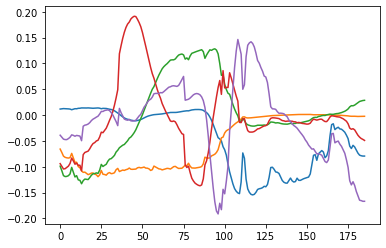

In [41]:
# loadings--
# loadings corresponds to wavelenths. By looking at the wavelengths, 
#we can understand which wavelengths have been given the weights for generating that score image

loadings = pc_0999.eigenvectors # 7 loadings because we have 7PCS. each loading has 186 variables.
print("loadings.shape", loadings.shape)

plt.plot(loadings[:,[0, 1, 2, 3, 4]]) #:--all the wavelengths, seeing only 0 to 4: total 5 PCS 
#PC0--blue--vegetation pos value, roads negtive value--0 to 110: vegatation
#PC1--Orange
#PC2--green
#PC3--red
#PC4--purple


In [34]:
# For stopping the spectral information printing
import logging, sys
logging.disable(sys.maxsize)

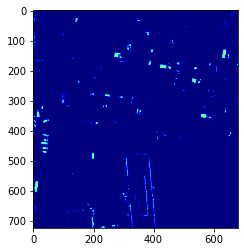

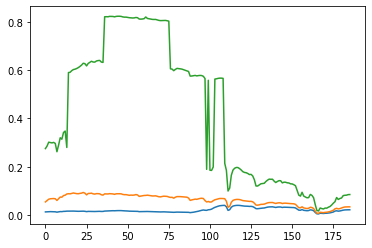

In [43]:
# kmeans--clustering alrothms, in groups that have similar behavior--- Unsupervised algorithm
(m,c) = kmeans(hyperim, 3, 30) # 5-clusters, 30-no of iterations--On the original image
# (m,c) = kmeans(img_pc, 5, 30) # 5-clusters, 30-no of iterations--On the PCs
plt.imshow(m,'jet')
plt.figure()
for i in range(c.shape[0]):
    plt.plot(c[i])

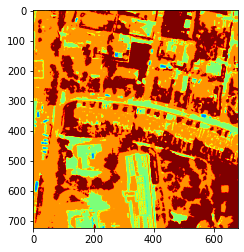

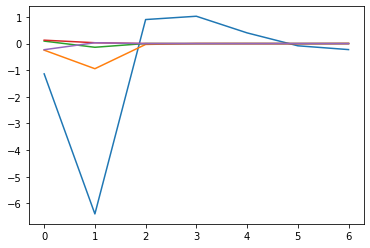

In [36]:
# kmeans--clustering alrothms, in groups that have similar behavior
(m,c) = kmeans(img_pc, 5, 30) # 5-clusters, 30-no of iterations--On the PCs
plt.imshow(m,'jet')
plt.figure()
for i in range(c.shape[0]):
    plt.plot(c[i])

# Superviser classification

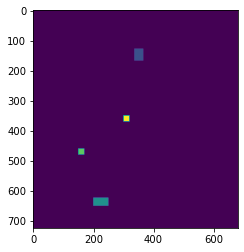

In [37]:
#Maximum likelihood classifier
#--4  classes or ground truth
shape = hyperim.shape
groundtruth = np.zeros([shape[0],shape[1]])

groundtruth[128:168,336:366] = 1.0   #grass
groundtruth[623:650, 200:250] = 2.0 # asphalt--ground
groundtruth[460:480, 150:170] = 3.0 # roof1

groundtruth[350:370, 300:320] = 4.0 # roof1

plt.figure()
plt.imshow(groundtruth)


Processing...  0.0Processing... 25.0Processing... 50.0Processing... 75.0Processing... 100.Processing...done   


ImageView object:
  Interpolation       :  <default>

<Figure size 432x288 with 0 Axes>

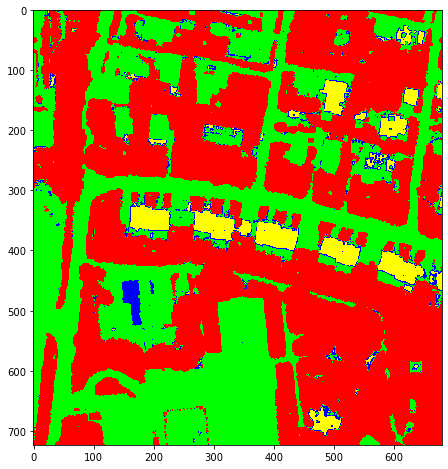

In [38]:
# Gaussian Maximum Likelihood classification
# 1. vegetation--orange
# 2. road-green
# 3. blueish roof-yellow, 
# 4. brownish roof--blue


classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)
plt.figure()
imshow(classes=clmap, figsize = (12,8))